In [17]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
import pandas as pd

(647, 2) (647,) (216, 2) (216,)


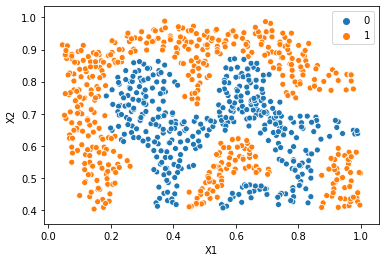

In [19]:
data=loadmat('ex6data2.mat')
X=pd.DataFrame(data['X'],columns=['X1','X2'])
y=data['y'].ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
sb.scatterplot(x=X['X1'],y=X['X2'],hue=y)

In [20]:
def kernel(x1,x2,sigma):#to understand the kernel
    return(np.exp(-(np.sum((X[:,0]-X[:,1])**2))))

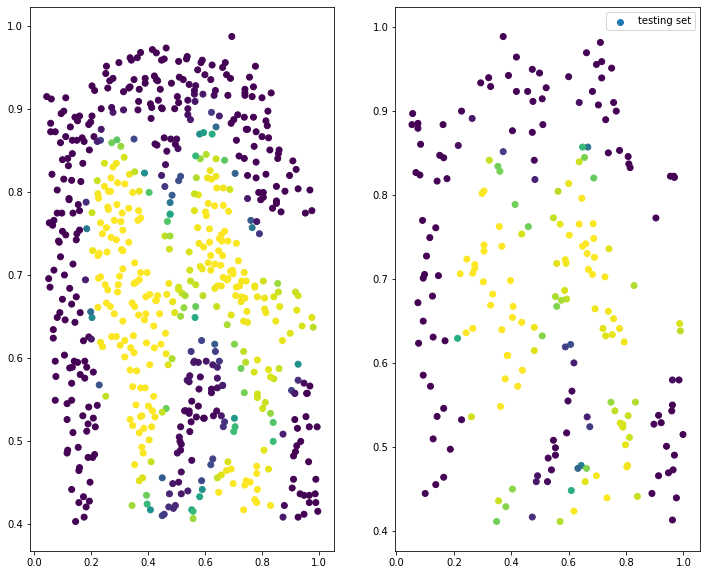

In [45]:
from sklearn.svm import SVC
model=SVC(C=100,gamma=10,probability=True)
model.fit(X_train,y_train)
temp=model.predict_proba(X_train)[:,0]
temp1=model.predict_proba(X_test)[:,0]
fig,ax=plt.subplots(1,2,figsize=(12,10))
ax[0].scatter(X_train['X1'],X_train['X2'],c=temp,label="training set")
ax[1].scatter(X_test['X1'],X_test['X2'],c=temp1,label="testing set")
plt.legend()

In [40]:
print('training accuracy =',model.score(X_train,y_train))
print('test accuracy =',model.score(X_test,y_test))

training accuracy = 0.9721792890262752
test accuracy = 0.9629629629629629
